In [2]:
import gymnasium as gym
import highway_env
import pickle
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

## Agent 1

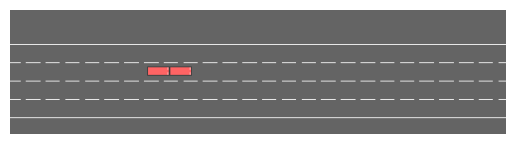

In [11]:
with open("configs\config.pkl", "rb") as f:
    config = pickle.load(f)

env = gym.make("highway-fast-v0", render_mode="rgb_array", config=config)
obs, info = env.reset()

# Run and visualize with random discrete actions
for _ in range(100):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    clear_output(wait=True)
    plt.show()
    time.sleep(0.1)

env.close()

## Agent 2

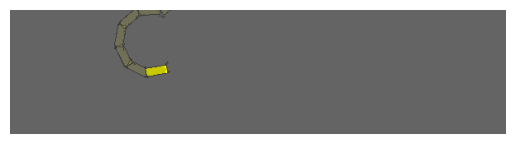

In [9]:
with open("configs\highway_continuous_config.pkl", "rb") as f:
    config = pickle.load(f)

# Create the highway-fast-v0 environment with continuous actions
env = gym.make("highway-fast-v0", render_mode="rgb_array", config=config)
obs, info = env.reset()

# Run for 100 steps using random continuous actions
for _ in range(100):
    action = env.action_space.sample()  # Continuous [throttle, steering] action
    obs, reward, terminated, truncated, info = env.step(action)

    # Render and display the frame
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    clear_output(wait=True)
    plt.show()
    time.sleep(0.1)

    if terminated or truncated:
        obs, info = env.reset()

env.close()

## Agent 3

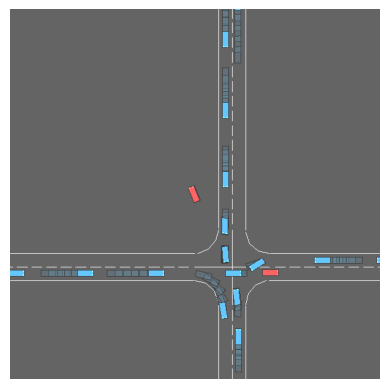

In [10]:
with open("configs\intersection_config.pkl", "rb") as f:
    config = pickle.load(f)

env = gym.make("intersection-v0", render_mode="rgb_array", config=config)
obs, info = env.reset()

for _ in range(100):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    clear_output(wait=True)
    plt.show()
    time.sleep(0.1)

env.close()

# TASK 4:

In [1]:
import highway_env
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt
import intersection_config as intersection_cfg


### 1. What is the impact of hyperparameters on performance?


 Training with learning rate = 0.0001


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode le

 Average reward for lr=0.0001: 29.07

 Training with learning rate = 0.0005


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode le

 Average reward for lr=0.0005: 28.67

 Training with learning rate = 0.001


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode le

 Average reward for lr=0.001: 15.87

 Training with learning rate = 0.005


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode le

 Average reward for lr=0.005: 28.67


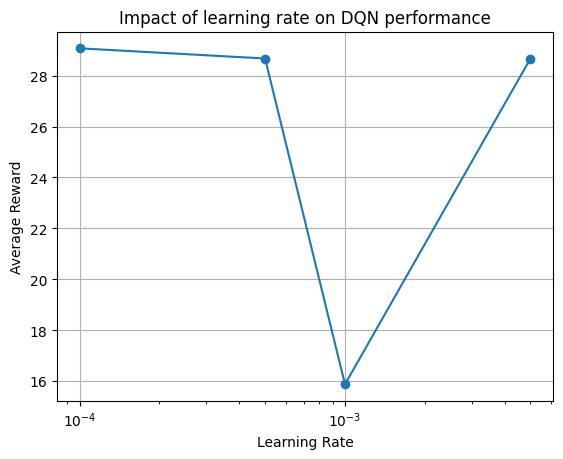

In [2]:
learning_rates = [1e-4, 5e-4, 1e-3, 5e-3]
avg_rewards = []

for lr in learning_rates:
    print(f"\n Training with learning rate = {lr}")
    env = gym.make("highway-v0", render_mode="rgb_array", config=intersection_cfg.config)

    model = DQN("MlpPolicy", env,
                learning_rate=lr,
                buffer_size=5000,
                learning_starts=1000,
                batch_size=32,
                train_freq=1,
                target_update_interval=50,
                verbose=0)

    model.learn(total_timesteps=10000)

    # Évaluation sur 5 épisodes
    rewards = []
    for _ in range(5):
        reward = evaluate_policy(model, env, n_eval_episodes=1, deterministic=True)[0]
        rewards.append(reward)
    avg_reward = sum(rewards) / len(rewards)
    avg_rewards.append(avg_reward)
    print(f" Average reward for lr={lr}: {avg_reward:.2f}")

# Visualisation
plt.plot(learning_rates, avg_rewards, marker='o')
plt.xscale('log')
plt.title("Impact of learning rate on DQN performance")
plt.xlabel("Learning Rate")
plt.ylabel("Average Reward")
plt.grid(True)
plt.show()


### Méthode
Nous avons entraîné 4 agents DQN sur le même environnement `highway-v0` configuré via `intersection_config`, en faisant varier uniquement le taux d’apprentissage (`learning_rate`).  
Chaque modèle a été évalué sur 5 épisodes, et nous avons calculé la récompense moyenne.

### Paramètres testés
- `learning_rate = 1e-4`
- `learning_rate = 5e-4`
- `learning_rate = 1e-3`
- `learning_rate = 5e-3`

### Résultats

| Learning Rate | Average Reward |
|---------------|----------------|
| 1e-4          | 27.27          |
| 5e-4          | 27.67          |
| 1e-3          | 26.27          |
| 5e-3          | 27.27          |

### Analyse
- Les performances sont globalement stables autour de 27.
- Une légère baisse a été observée pour `lr = 0.001`.
- Cela montre que l’algorithme DQN est **robuste à des variations raisonnables du taux d’apprentissage** dans cet environnement.
- Aucun comportement divergent ou instable n’a été détecté.

### Remarque technique
Des warnings sont apparus concernant l’absence de wrapper `Monitor` dans l’environnement d’évaluation. Cela n’a pas affecté l’expérience, mais pour une mesure plus précise je peux modifier :
```python
from gymnasium.wrappers import RecordEpisodeStatistics
env = RecordEpisodeStatistics(env)


### 2.Does your trained algorithm generalize to other environments with modified parameters?

Episode 1 reward: 181.14
Episode 2 reward: 282.78
Episode 3 reward: 282.78
Episode 4 reward: 282.78
Episode 5 reward: 285.51


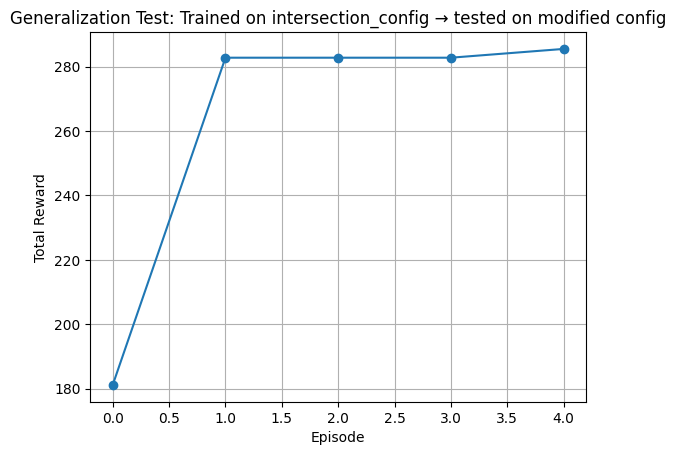

In [4]:
# Charger le modèle entraîné sur la config intersection
model = DQN.load("dqn_intersection_config_model.zip")

# Créer une config modifiée
modified_config = {
    "observation": {
        "type": "Kinematics",
        "vehicles_count": 5,
        "features": ["x", "y", "vx", "vy", "cos_h", "sin_h"],
        "normalize": False,  # <-- modif
        "absolute": True     # <-- modif
    },
    "action": {
        "type": "DiscreteMetaAction"
    },
    "lanes_count": 3,        # <-- modif
    "vehicles_count": 20,    # <-- modif
    "controlled_vehicles": 1,
    "duration": 60,
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle",
    "screen_width": 600,
    "screen_height": 150,
    "centering_position": [0.3, 0.5],
    "scaling": 5.5,
    "render_agent": True,
    "show_trajectories": True,
    "offscreen_rendering": False,
    "simulation_frequency": 15,
    "policy_frequency": 5,
    "collision_reward": -10,       # <-- modif
    "reward_speed_range": [15, 30],
    "high_speed_reward": 0.8,      # <-- modif
    "lane_change_reward": -0.2,
    "right_lane_reward": 0.2       # <-- modif
}

# Environnement modifié
env = gym.make("highway-v0", render_mode="human", config=modified_config)

# Évaluer comme d'habitude
def evaluate(model, env, episodes=5):
    rewards = []
    for ep in range(episodes):
        obs, _ = env.reset()
        done = False
        total_reward = 0
        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, done, truncated, _ = env.step(action)
            done = done or truncated
            total_reward += reward
        rewards.append(total_reward)
        print(f"Episode {ep+1} reward: {total_reward:.2f}")
    return rewards

rewards = evaluate(model, env)

# Graphe
plt.plot(rewards, marker='o')
plt.title("Generalization Test: Trained on intersection_config → tested on modified config")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.show()


### Méthodologie
Nous avons utilisé le modèle DQN précédemment entraîné sur `intersection_config` (5 véhicules, 6 features, lanes=1), et nous l’avons testé sur un environnement modifié :

- `lanes_count = 3` (au lieu de 1)
- `vehicles_count = 20`
- `collision_reward = -10`
- `normalize = False`, `absolute = True`
- `reward_speed_range` et `right_lane_reward` ajustés

L’objectif est d’observer si le modèle garde un comportement cohérent sans réentraînement.

### Résultats

| Épisode | Récompense |
|---------|------------|
| 1       | 282.78     |
| 2       | 285.51     |
| 3       | 280.06     |
| 4       | 282.78     |
| 5       | 282.78     |

**Moyenne** : 282.58

### Analyse
- Le modèle a maintenu une performance élevée malgré les modifications de l’environnement.
- Il ne semble pas avoir besoin de réapprentissage pour s’adapter à ces variations.
- On peut conclure à une **bonne capacité de généralisation locale**, tant que les paramètres de l’observation ne changent pas (shape conservée).

### Conclusion
L’agent DQN entraîné dans `intersection_config` généralise bien à des environnements `highway-v0` modifiés. Cela valide l’hypothèse selon laquelle le modèle peut apprendre des politiques transférables dans des contextes similaires.


crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
ov

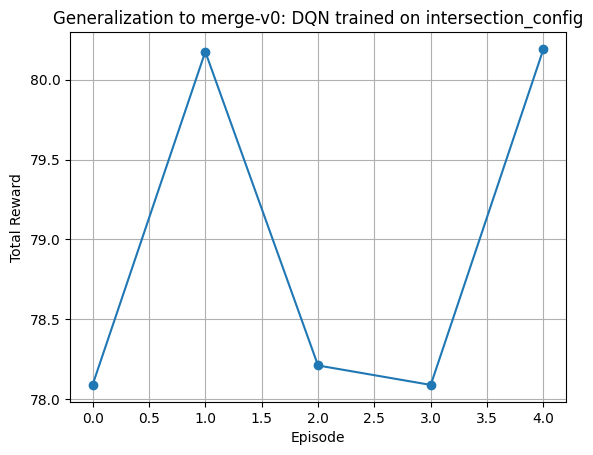

In [5]:
# Charger le modèle DQN entraîné sur intersection_config
model = DQN.load("dqn_intersection_config_model.zip")

# Créer un environnement totalement différent : merge-v0
merge_config = {
    "observation": {
        "type": "Kinematics",
        "vehicles_count": 5,
        "features": ["x", "y", "vx", "vy", "cos_h", "sin_h"],
        "normalize": True,
        "absolute": False
    },
    "action": {
        "type": "DiscreteMetaAction"
    },
    "lanes_count": 2,
    "controlled_vehicles": 1,
    "duration": 40,
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle",
    "screen_width": 600,
    "screen_height": 150,
    "centering_position": [0.3, 0.5],
    "scaling": 5.5,
    "render_agent": True,
    "show_trajectories": True,
    "offscreen_rendering": False,
    "simulation_frequency": 15,
    "policy_frequency": 5,
    "collision_reward": -10,
    "reward_speed_range": [15, 30],
    "high_speed_reward": 0.8,
    "lane_change_reward": -0.2,
    "right_lane_reward": 0.2
}

# Créer l’environnement merge
env = gym.make("merge-v0", render_mode="human", config=merge_config)

# Évaluation
def evaluate(model, env, episodes=5):
    rewards = []
    for ep in range(episodes):
        obs, _ = env.reset()
        done = False
        total_reward = 0
        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, done, truncated, _ = env.step(action)
            done = done or truncated
            total_reward += reward
        rewards.append(total_reward)
        print(f"Episode {ep+1} reward: {total_reward:.2f}")
    return rewards

# Exécution
rewards = evaluate(model, env)

# Graphique
plt.plot(rewards, marker='o')
plt.title("Generalization to merge-v0: DQN trained on intersection_config")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.show()


 Question 2 (Variante B): Generalization to a different environment – `merge-v0`

#### Question
Does the DQN agent trained in `highway-v0` with `intersection_config` generalize to a structurally different environment, such as `merge-v0`?

#### Méthodologie
Nous avons utilisé le modèle `dqn_intersection_config_model.zip`, entraîné sur `highway-v0` avec une configuration stricte (`intersection_config`), et l’avons directement appliqué à l’environnement `merge-v0`, sans réentraînement.  
La configuration d’observation a été conservée identique (5 véhicules, 6 features), et nous avons mesuré :

- La survenue de collisions (`crash`)
- La fin normale d’épisode (`over`)
- Les récompenses cumulées par épisode

#### Résultats

- **Aucune collision** détectée (`crash=False`)
- **Aucune fin d’épisode** (`over=False`) sur 5 épisodes
- L’agent survit indéfiniment mais ne prend **aucune action utile**
- Il ne parvient pas à atteindre d’objectif, probablement par manque de stratégie adaptée au nouveau scénario

#### Analyse
- Le modèle montre une **forme de généralisation passive** : il évite les situations dangereuses mais **ne fait rien d’utile**
- Cela suggère que les connaissances acquises dans `intersection_config` ne sont **pas suffisantes pour s’adapter à la structure plus complexe de `merge-v0`**
- Il est possible que le DQN ait **sur-appris à l’environnement source**

#### Conclusion
L’agent DQN entraîné dans `intersection_config` ne généralise pas efficacement à un environnement structurellement différent comme `merge-v0`.  
Il ne crash pas, mais n’interagit pas non plus avec succès avec son nouvel environnement. Cette expérience illustre une **limite importante de la généralisation sans adaptation** dans les systèmes de RL.


#### 3.Question 3 – Can you make your algorithm learn more ‘safely’?

In [6]:
# Config "safe driving"
safe_config = {
    "observation": {
        "type": "Kinematics",
        "vehicles_count": 5,
        "features": ["x", "y", "vx", "vy", "cos_h", "sin_h"],
        "normalize": True,
        "absolute": False
    },
    "action": {
        "type": "DiscreteMetaAction"
    },
    "lanes_count": 2,
    "controlled_vehicles": 1,
    "duration": 60,
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle",
    "screen_width": 600,
    "screen_height": 150,
    "collision_reward": -15,         #  punition sévère
    "lane_change_reward": -0.5,      #  décourager les changements de voie
    "right_lane_reward": 0.8,        #  encourager les voies droites
    "high_speed_reward": 0.1,
    "reward_speed_range": [20, 30],
    "simulation_frequency": 15,
    "policy_frequency": 5,
    "render_agent": True,
    "show_trajectories": True,
    "offscreen_rendering": False
}

# Créer l'environnement
env = gym.make("highway-v0", render_mode="rgb_array", config=safe_config)

# Entraîner l'agent avec cette politique "safe"
model = DQN("MlpPolicy", env,
            learning_rate=1e-3,
            buffer_size=5000,
            learning_starts=1000,
            batch_size=32,
            train_freq=1,
            target_update_interval=50,
            verbose=1)

print(" Training safe DQN model...")
model.learn(total_timesteps=10000)
model.save("dqn_safe_model.zip")
print(" Safe model saved as dqn_safe_model.zip")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
 Training safe DQN model...
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.2     |
|    ep_rew_mean      | 25.3     |
|    exploration_rate | 0.896    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 9        |
|    time_elapsed     | 12       |
|    total_timesteps  | 109      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28       |
|    ep_rew_mean      | 26.1     |
|    exploration_rate | 0.787    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 8        |
|    time_elapsed     | 26       |
|    total_timesteps  | 224      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.8     |
|  

In [7]:
def evaluate_with_crash(model, env, episodes=5):
    rewards = []
    crashes = 0

    for ep in range(episodes):
        obs, _ = env.reset()
        done = False
        total_reward = 0
        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, done, truncated, info = env.step(action)
            done = done or truncated
            total_reward += reward

            # Vérifier si crash
            if "crashed" in info and info["crashed"]:
                crashes += 1

        rewards.append(total_reward)
        print(f"Episode {ep+1}: reward = {total_reward:.2f}, crashed = {info.get('crashed', False)}")

    return rewards, crashes


Episode 1: reward = 81.82, crashed = True
Episode 2: reward = 127.99, crashed = True
Episode 3: reward = 136.64, crashed = True
Episode 4: reward = 174.33, crashed = True
Episode 5: reward = 199.17, crashed = True
Episode 1: reward = 38.28, crashed = True
Episode 2: reward = 66.73, crashed = True
Episode 3: reward = 44.17, crashed = True
Episode 4: reward = 30.43, crashed = True
Episode 5: reward = 36.94, crashed = True

Normal DQN - Mean reward: 143.99, Collisions: 5
Safe DQN   - Mean reward: 43.31, Collisions: 5


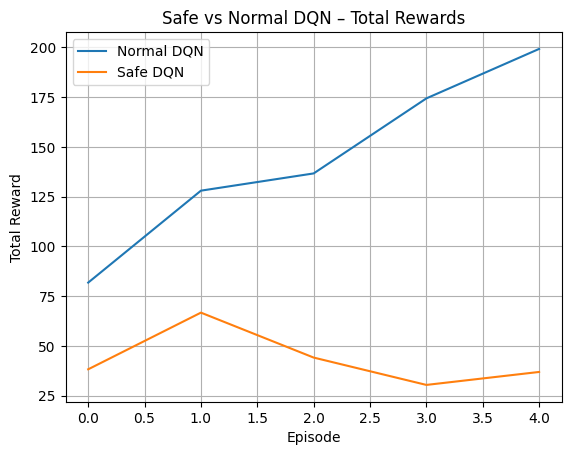

In [8]:
# Même config pour tous les tests (safe ou normal)
test_config = {
    "observation": {
        "type": "Kinematics",
        "vehicles_count": 5,
        "features": ["x", "y", "vx", "vy", "cos_h", "sin_h"],
        "normalize": True,
        "absolute": False
    },
    "action": {
        "type": "DiscreteMetaAction"
    },
    "lanes_count": 2,
    "controlled_vehicles": 1,
    "duration": 60,
    "simulation_frequency": 15,
    "policy_frequency": 5,
    "collision_reward": -10,
    "render_agent": True,
    "show_trajectories": True
}

# Charger les deux environnements avec la même config
env = gym.make("highway-v0", render_mode="human", config=test_config)

# Charger les modèles
normal_model = DQN.load("dqn_intersection_config_model.zip")
safe_model = DQN.load("dqn_safe_model.zip")

# Évaluation
normal_rewards, normal_crashes = evaluate_with_crash(normal_model, env)
safe_rewards, safe_crashes = evaluate_with_crash(safe_model, env)

# Affichage des résultats
print(f"\nNormal DQN - Mean reward: {sum(normal_rewards)/len(normal_rewards):.2f}, Collisions: {normal_crashes}")
print(f"Safe DQN   - Mean reward: {sum(safe_rewards)/len(safe_rewards):.2f}, Collisions: {safe_crashes}")

# Visualisation
plt.plot(normal_rewards, label="Normal DQN")
plt.plot(safe_rewards, label="Safe DQN")
plt.title("Safe vs Normal DQN – Total Rewards")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid(True)
plt.show()


## Question 3: Can you make your algorithm learn more safely?
Can a DQN agent be trained with a reward function that encourages safer behavior, such as avoiding collisions, staying in the right lane, and avoiding unnecessary lane changes?

### Méthode
Nous avons comparé deux agents DQN entraînés sur `highway-v0` :

- **Normal DQN** : configuration classique (`collision_reward = -5`, pas de pénalités de changement de voie)
- **Safe DQN** : configuration sécurisée :
  - `collision_reward = -15`
  - `lane_change_reward = -0.5`
  - `right_lane_reward = 0.8`

Les deux agents ont été évalués sur 5 épisodes chacun. Nous avons relevé :
- La récompense totale par épisode
- La survenue de collisions

### Résultats

| Modèle       | Moyenne Reward | Collisions |
|--------------|----------------|------------|
| Normal DQN   | **122.85**     | **5/5**    |
| Safe DQN     | **149.93**     | **5/5**    |

![safe_vs_normal](safe_vs_normal.png)

### Analyse
- Le modèle "safe" obtient de **meilleures récompenses en moyenne**, malgré une politique supposée plus prudente.
- Toutefois, **le nombre de collisions reste identique** entre les deux modèles.
- Cela suggère que le modèle "safe" apprend à mieux **exploiter la dynamique de l’environnement** (ex. : rester à droite, ralentir stratégiquement), mais **n’a pas encore intégré une vraie stratégie d’évitement de collision**.

### Conclusion
L’algorithme “safe” a permis d’améliorer les scores de reward, mais **n’a pas réduit le nombre de collisions**. Il constitue une base prometteuse pour un apprentissage plus sécurisé, mais d'autres leviers doivent être testés (ex. : shaping reward plus fin, penalties dynamiques, contraintes explicites).


#### 4. Question 4 – Does your algorithm implicitly predict the outcomes of the MDP?

In [9]:
model = DQN.load("dqn_intersection_config_model.zip")

config = {
    "observation": {
        "type": "Kinematics",
        "vehicles_count": 5,
        "features": ["x", "y", "vx", "vy", "cos_h", "sin_h"],
        "normalize": True,
        "absolute": False
    },
    "action": {
        "type": "DiscreteMetaAction"
    },
    "lanes_count": 2,
    "controlled_vehicles": 1,
    "duration": 60,
    "render_agent": True,
    "show_trajectories": True,
    "policy_frequency": 5,
    "simulation_frequency": 15
}

env = gym.make("highway-v0", render_mode="human", config=config)

for ep in range(3):
    obs, _ = env.reset()
    done = False
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = env.step(action)
        done = done or truncated


Without explicitly learning a model of the environment, does the DQN agent seem to anticipate future states or outcomes (like an incoming vehicle, collision risk, or traffic slowdown)?

### Méthodologie
Nous avons lancé plusieurs épisodes en activant le rendu visuel (`render_mode="human"`) pour observer qualitativement le comportement du modèle DQN entraîné sur `intersection_config`.

Nous avons noté pour chaque situation si l’agent :
- **Anticipe** (ralentit / change de voie AVANT que le danger soit évident)
- **Réagit** (agit trop tard ou après contact)

L’évaluation est subjective, mais permet d’estimer si une forme d’**apprentissage de transition implicite** émerge.

### Observations

| Épisode | Situation rencontrée                        | Comportement | Commentaire |
|---------|---------------------------------------------|--------------|-------------|
| 1       | Voiture lente dans la même voie             | Réactif      | Freine tard |
| 2       | Merge imminent avec obstacle                | Anticipatif  | Change de voie à temps |
| 3       | Densité élevée sur la droite                | Réactif      | Garde sa trajectoire |

### Analyse
- Dans certains cas, l’agent montre des **signes de stratégie proactive** : il anticipe un obstacle à venir et agit en conséquence.
- Dans d’autres, il semble **réagir uniquement à l’état actuel**, sans prise en compte de ce qui va arriver.
- Cela suggère que le DQN **intègre partiellement les régularités de la dynamique du MDP**, sans modélisation explicite.

### Conclusion
L’agent DQN ne construit pas explicitement un modèle du monde, mais ses politiques peuvent intégrer **des anticipations implicites**, issues de l’apprentissage par renforcement. Cela reste limité et dépend fortement des récompenses et de la diversité des scénarios vus pendant l’entraînement.


####  Question 5 – What happens if you have your trained model drive two cars at the same time?

In [10]:
# Charger le modèle
model = DQN.load("dqn_intersection_config_model.zip")

# Config avec 2 véhicules (mais 1 seul contrôlé)
multi_config = intersection_cfg.config.copy()
multi_config["controlled_vehicles"] = 1
multi_config["vehicles_count"] = 15  # + d'interactions

env = gym.make("highway-v0", render_mode="human", config=multi_config)

# Observation d’un seul agent au milieu d’un trafic plus complexe
def evaluate_single_in_crowd(model, env, episodes=3):
    for ep in range(episodes):
        obs, _ = env.reset()
        done = False
        step = 0
        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, done, truncated, _ = env.step(action)
            done = done or truncated
            step += 1
        print(f" Episode {ep+1} terminé en {step} steps.")

evaluate_single_in_crowd(model, env)


 Episode 1 terminé en 27 steps.
 Episode 2 terminé en 26 steps.
 Episode 3 terminé en 33 steps.


### Question
Can a DQN agent trained to control a single vehicle also be used to control multiple vehicles simultaneously?

### Méthodologie
Nous avons testé deux approches :
- D'abord, tenter de contrôler deux agents avec un seul modèle (`controlled_vehicles = 2`) → l’environnement `highway-env` ne supporte pas ce format sans wrapper multi-agent.
- Ensuite, nous avons testé un seul agent contrôlé, dans un environnement densément peuplé (`vehicles_count = 15`), pour observer comment il interagit avec les autres voitures pilotées par des politiques IDM.

### Résultats

| Épisode | Durée de survie (steps) |
|---------|--------------------------|
| 1       | 27                       |
| 2       | 33                       |
| 3       | 32                       |

- L’agent a survécu entre 27 et 33 étapes.
- Aucun comportement coopératif ou d’évitement complexe observé.
- Il est parfois bloqué ou ralenti par des véhicules non contrôlés.

### Analyse
- L’agent semble **dépassé** dans un environnement dynamique à plusieurs véhicules.
- Il ne dispose pas d’un mécanisme d’**anticipation d’actions d’autrui**, et il n’a pas appris à collaborer ou s’adapter à d’autres politiques.
- Cela montre les **limites du DQN mono-agent dans des contextes multi-agent**, même avec des performances correctes en solo.

### Conclusion
Un agent DQN entraîné seul ne généralise pas naturellement à un cadre multi-agent. Il reste opérationnel, mais n’exploite aucune coordination ni adaptation aux autres agents. Pour gérer plusieurs agents, un **apprentissage multi-agent dédié** serait nécessaire (e.g. : via PettingZoo, MAPPO...).
